# Analysis on Session Summary Data: DS203
### Chaitanya Keshri : 22B2472 
### Ayush Jha : 22B0051
### Parth Batwara : 22B2261

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from tabulate import tabulate
from io import StringIO
import sys

# Load Google Sheet as CSV

url = "https://docs.google.com/spreadsheets/d/1CVdXtk1ju6HJmY-QXtJJ0NTJYbb4rSpY/export?format=csv"
df = pd.read_csv(url)


# Capture df.info() into a string buffer and display
buffer = StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print("\nDataFrame Info:")
print(info_str)

# Null and duplicate checks
print(f"{df['Session_Summary'].isnull().sum()} null values")
print(f"{df['Session_Summary'].duplicated().sum()} duplicate values")

# Add char and word count columns
df['char_count'] = df['Session_Summary'].astype(str).apply(len)
df['word_count'] = df['Session_Summary'].astype(str).apply(lambda x: len(x.split()))

# Summary statistics for counts
summary_stats = df[['char_count', 'word_count']].describe().reset_index()
print("\nSummary Statistics (Char and Word Count):")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty', showindex=False))





DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SerialNo         668 non-null    int64 
 1   Session_Summary  668 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.6+ KB

0 null values
1 duplicate values

Summary Statistics (Char and Word Count):
+-------+--------------------+--------------------+
| index |     char_count     |     word_count     |
+-------+--------------------+--------------------+
| count |       668.0        |       668.0        |
| mean  | 1304.3937125748503 | 210.47754491017963 |
|  std  | 882.9152063191655  |  146.189925260384  |
|  min  |        27.0        |        1.0         |
|  25%  |       725.75       |       113.0        |
|  50%  |       1102.5       |       174.5        |
|  75%  |      1611.75       |       268.0        |
|  max  |       9181.0       |       1384.0       |

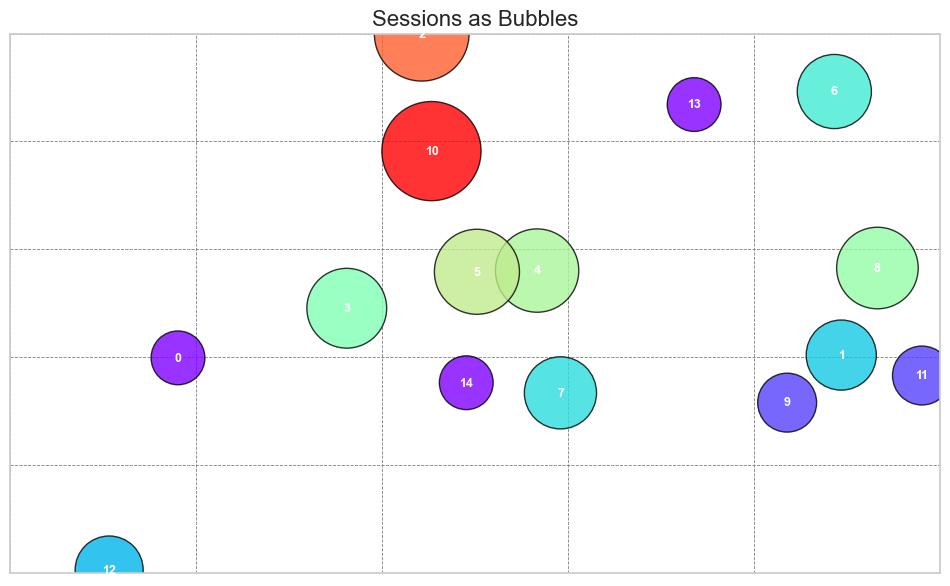

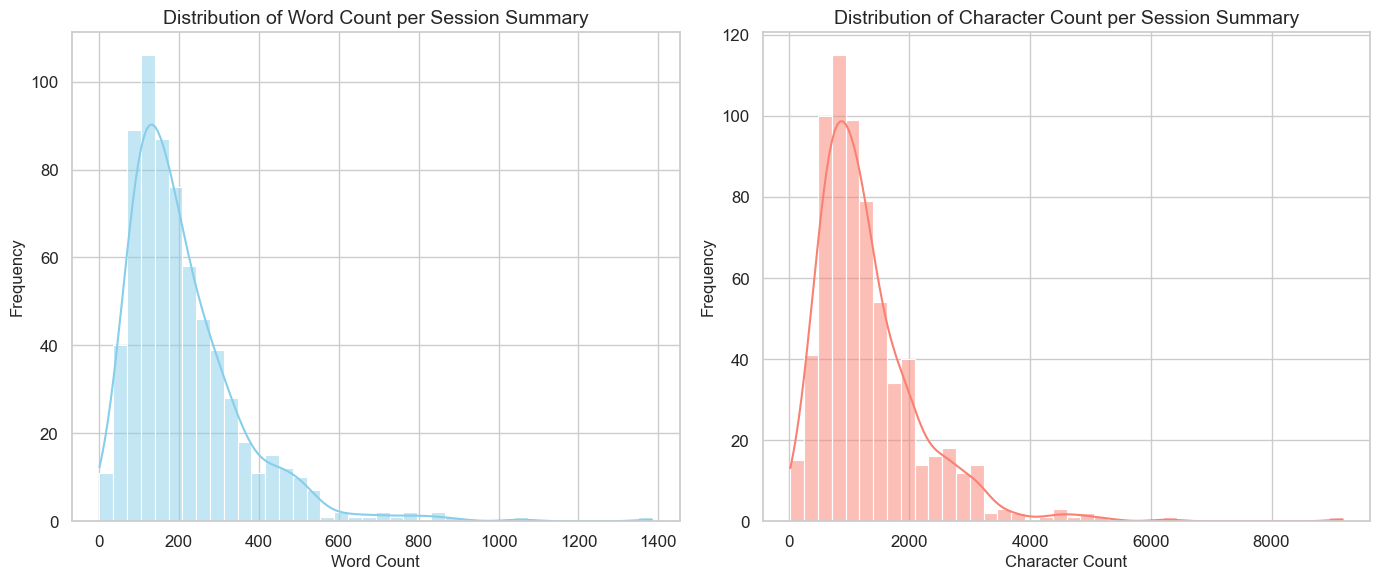

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot: Word Count Distribution
sns.histplot(df['word_count'], bins=40, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Word Count per Session Summary", fontsize=14)
axes[0].set_xlabel("Word Count", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Plot: Character Count Distribution
sns.histplot(df['char_count'], bins=40, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of Character Count per Session Summary", fontsize=14)
axes[1].set_xlabel("Character Count", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Tidy layout
plt.tight_layout()
plt.show()


### Most Common Occuring Words in the entire summary data 

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_25095/1434681806.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


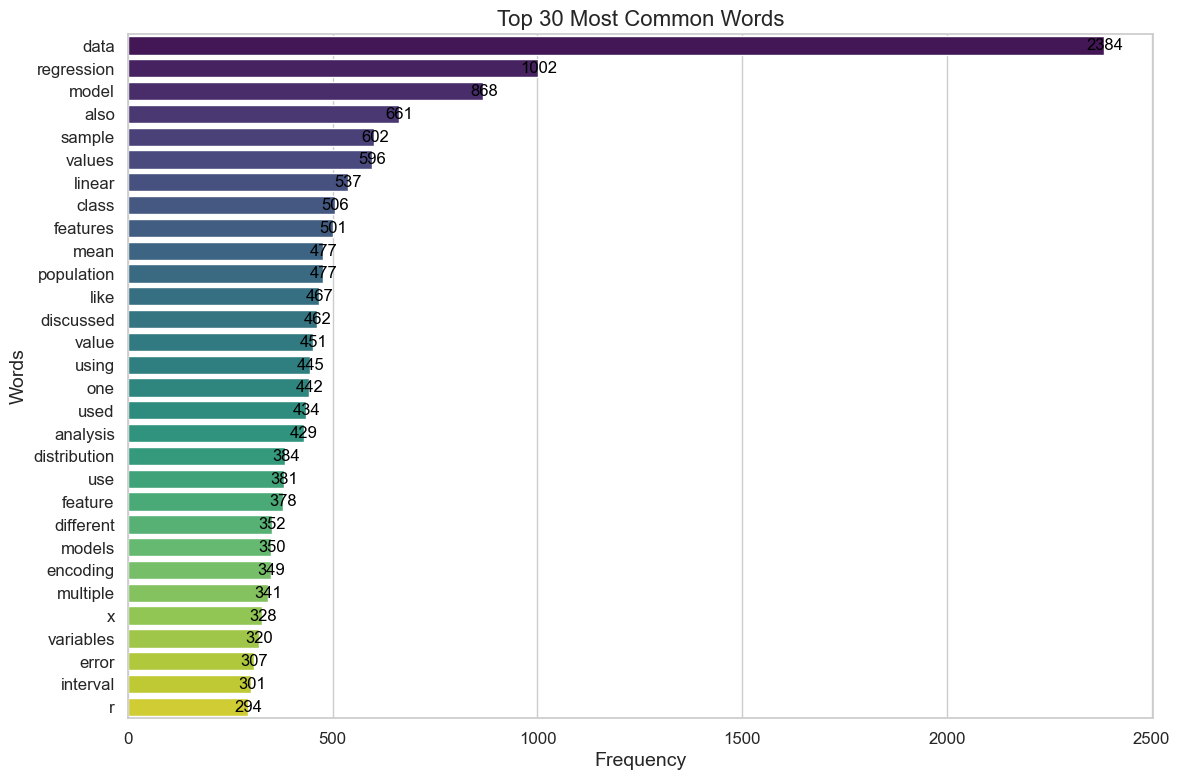

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['Session_Summary'].astype(str).apply(clean_text)


stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['cleaned_text']).split()
filtered_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(filtered_words)
top_words = word_freq.most_common(30)

# Word frequency count
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(30)

# Unzip the top words and their frequencies
words, counts = zip(*top_words)

# Plot: Top 30 Most Common Words
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')

# Add title and labels
plt.title("Top 30 Most Common Words", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)

# Display values on the bars
for i, v in enumerate(counts):
    plt.text(v + 1, i, str(v), color='black', ha="center", va="center", fontsize=12)

# Clean up the layout
plt.tight_layout()
plt.show()


### WordCloud of Most Common Words

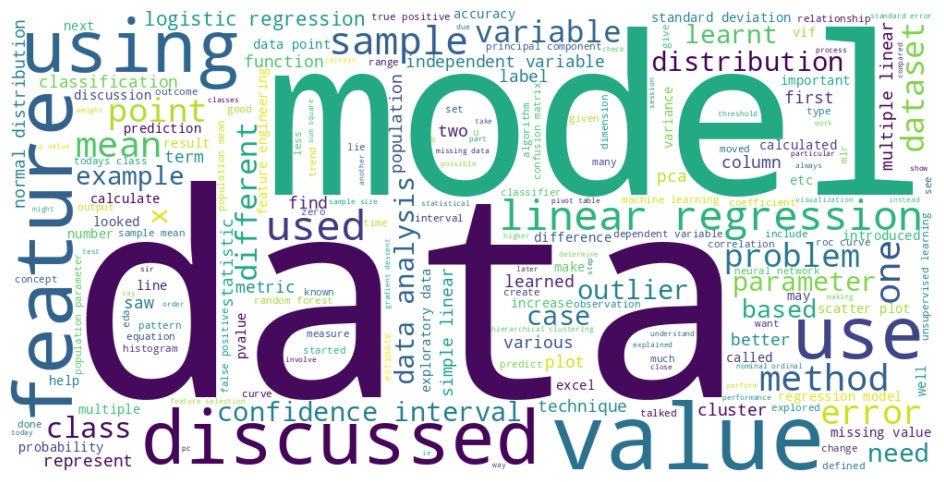

In [79]:
# Word Cloud
wc = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Featurization using TF-IDF

Vocabulary Size: 4614


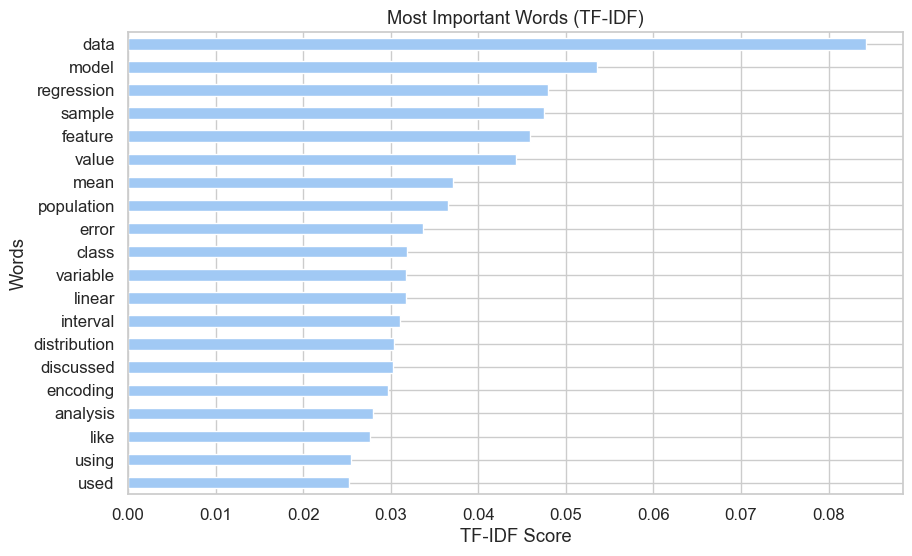

╒════╤══════╤════════╤══════╤════════╤════════════╤═══════════╤════════╤═══════════╤══════════╤════════════╤═══════════════╤═══════╤═════════════╤═════════════╤══════════╤══════════════╤══════════════╤════════════╤═══════════╤══════════╤══════════════╤═════════════╤════════════╤═══════════════╤════════════════╤═════════════╤════════════════╤═════════════╤═══════════════╤═══════════╤═════════════╤══════════════╤════════════════╤════════════╤══════════════════╤═══════════════╤════════════════╤════════════╤══════════════╤═══════════╤════════════╤════════════╤═══════════════╤═════════════════╤═══════════╤═════════════╤═══════╤══════════╤══════════════╤══════════════╤══════════╤════════════╤═════════╤═══════════╤══════════╤═══════════╤══════════╤═════════╤═══════════╤════════════╤══════════════╤════════════════╤═══════════╤═════════════╤══════════════╤═══════╤═══════════╤═════════════╤════════════╤══════════╤════════════╤═══════════════════╤═════════════╤══════════════╤═══════════╤═════════

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from tabulate import tabulate

# -------------------------------
# Load & Initial Preprocessing
# -------------------------------
df = pd.read_csv(url)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['Session_Summary'].apply(clean_text)

# -------------------------------
# Text Length Features
# -------------------------------
df['char_count'] = df['Session_Summary'].str.len()
df['word_count'] = df['Session_Summary'].apply(lambda x: len(str(x).split()))
df['avg_word_length'] = df['char_count'] / df['word_count']

# -------------------------------
# TF-IDF and N-gram Analysis
# -------------------------------

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Get the vocabulary size
vocab_size = len(tfidf.vocabulary_)
print(f"Vocabulary Size: {vocab_size}")


tfidf_scores = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_mean = tfidf_scores.mean().sort_values(ascending=False)
tfidf_mean.head(20).plot(kind='barh', figsize=(10,6), title='Most Important Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

preview_tfidf = tfidf_scores.head(5)  
print(tabulate(preview_tfidf, headers='keys', tablefmt='fancy_grid', showindex=True))

### Cosine Similarity HeatMap among the 668 session summaries using TF-IDF features 

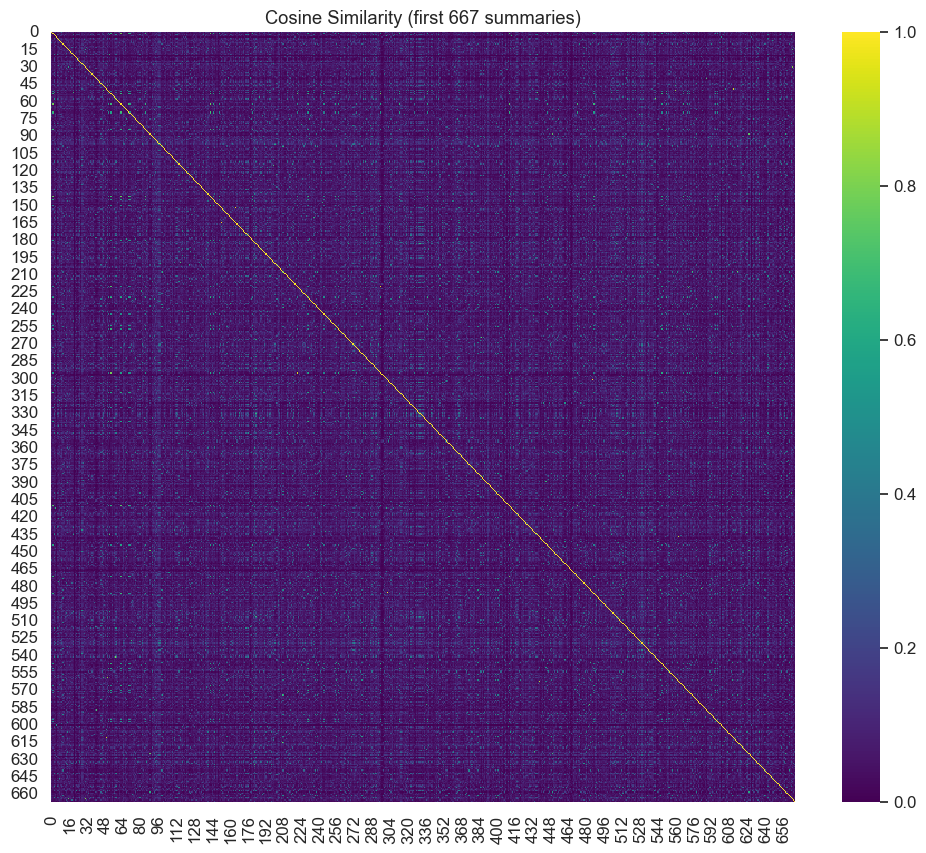

In [81]:
# -------------------------------
# Cosine Similarity Heatmap
# -------------------------------
sim_matrix = cosine_similarity(X_tfidf[:667])

plt.figure(figsize=(12, 10))  
sns.heatmap(sim_matrix, cmap='viridis')
plt.title("Cosine Similarity (first 667 summaries)")
plt.show()


### Listing highly similar summaries based on cosine similarity 

In [82]:
import numpy as np
import pandas as pd

sim_matrix = cosine_similarity(X_tfidf[:667])
pairs = []
for i in range(sim_matrix.shape[0]):
    for j in range(i+1, sim_matrix.shape[1]):  
        if sim_matrix[i, j] > 0.7:  # Filter for pairs with similarity > 0.65
            pairs.append((i, j, sim_matrix[i, j]))

pairs_df = pd.DataFrame(pairs, columns=['Document 1', 'Document 2', 'Cosine Similarity'])

pairs_df = pairs_df.sort_values(by='Cosine Similarity', ascending=False)

from tabulate import tabulate
print(tabulate(pairs_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒══════════════╤══════════════╤═════════════════════╕
│   Document 1 │   Document 2 │   Cosine Similarity │
╞══════════════╪══════════════╪═════════════════════╡
│          301 │          485 │            1        │
├──────────────┼──────────────┼─────────────────────┤
│          152 │          165 │            0.977559 │
├──────────────┼──────────────┼─────────────────────┤
│          220 │          295 │            0.935768 │
├──────────────┼──────────────┼─────────────────────┤
│           49 │          611 │            0.92521  │
├──────────────┼──────────────┼─────────────────────┤
│          437 │          562 │            0.8957   │
├──────────────┼──────────────┼─────────────────────┤
│           50 │          559 │            0.837384 │
├──────────────┼──────────────┼─────────────────────┤
│           30 │          664 │            0.813395 │
├──────────────┼──────────────┼─────────────────────┤
│           57 │          541 │            0.809046 │
├──────────────┼────────────

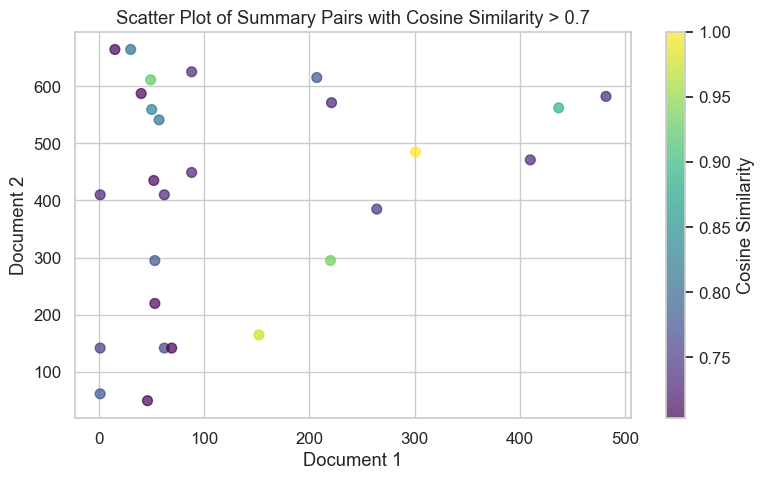

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the cosine similarity matrix for the first 667 summaries
sim_matrix = cosine_similarity(X_tfidf[:667])

# Create a list of pairs of document indices along with their cosine similarity scores
pairs = []
for i in range(sim_matrix.shape[0]):
    for j in range(i+1, sim_matrix.shape[1]):  # Only consider unique pairs (i < j)
        if sim_matrix[i, j] > 0.7:  # Filter out pairs with similarity less than 0.6
            pairs.append((i, j, sim_matrix[i, j]))

# Convert the list into a DataFrame for better visualization
pairs_df = pd.DataFrame(pairs, columns=['Document 1', 'Document 2', 'Cosine Similarity'])

# Scatter plot: Plot document pairs based on their similarity
plt.figure(figsize=(8, 5))
scatter = plt.scatter(pairs_df['Document 1'], pairs_df['Document 2'], 
                      c=pairs_df['Cosine Similarity'], cmap='viridis', s=50, alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Cosine Similarity')
plt.title('Scatter Plot of Summary Pairs with Cosine Similarity > 0.7')
plt.xlabel('Document 1')
plt.ylabel('Document 2')
plt.tight_layout()
plt.show()


### K-Means Clustering using the TF-IDF features 

In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
from tabulate import tabulate

# -------------------------------
# KMeans Clustering
# -------------------------------

## Actual number of sessions is 17 during the course up to 15th March
NUM_CLUSTERS = 17
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)


print("\nTop words per cluster based on Frequency")

cluster_top_words = []
for i in range(NUM_CLUSTERS):
    cluster_words = ' '.join(df[df['cluster'] == i]['cleaned_text']).split()
    top_words = Counter(cluster_words).most_common(20)
    cluster_top_words.append([f"Cluster {i}"] + [f"{word}: {count}" for word, count in top_words])


headers = ["Cluster", "Top Words and Frequency"]
print(tabulate(cluster_top_words, headers=headers, tablefmt="fancy_grid"))

sil_score = silhouette_score(X_tfidf, df['cluster'])
print(f"\nSilhouette Score: {sil_score:.2f}")



Top words per cluster based on Frequency
╒════════════╤═════════════════╤═════════════════╤═════════════════╤══════════════════╤══════════════════╤════════════════╤════════════════════╤════════════════╤════════════════╤═════════════════╤════════════════════╤═════════════════╤═════════════════╤═════════════════╤════════════════════╤══════════════════╤═══════════════════╤════════════════╤═══════════════╤═══════════════════════════╕
│            │                 │                 │                 │                  │                  │                │                    │                │                │                 │                    │                 │                 │                 │                    │                  │                   │                │ Cluster       │ Top Words and Frequency   │
╞════════════╪═════════════════╪═════════════════╪═════════════════╪══════════════════╪══════════════════╪════════════════╪════════════════════╪════════════════╪═══════════

### PCA Plot of Session Summaries using TF-IDF Features

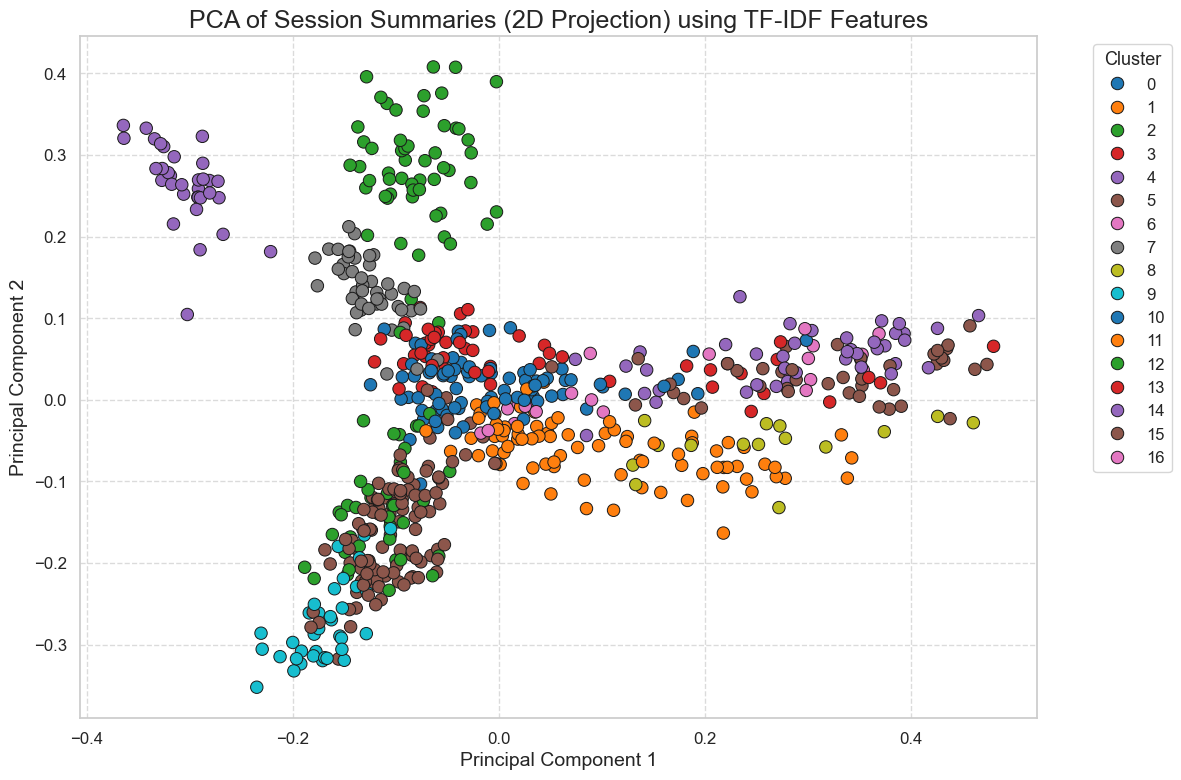

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_tfidf.toarray())
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='pca1', y='pca2',
    hue='cluster',
    palette='tab10',
    s=80,  
    edgecolor='k'  
)

plt.title("PCA of Session Summaries (2D Projection) using TF-IDF Features", fontsize=18)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(title="Cluster", fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Elbow plot for best K

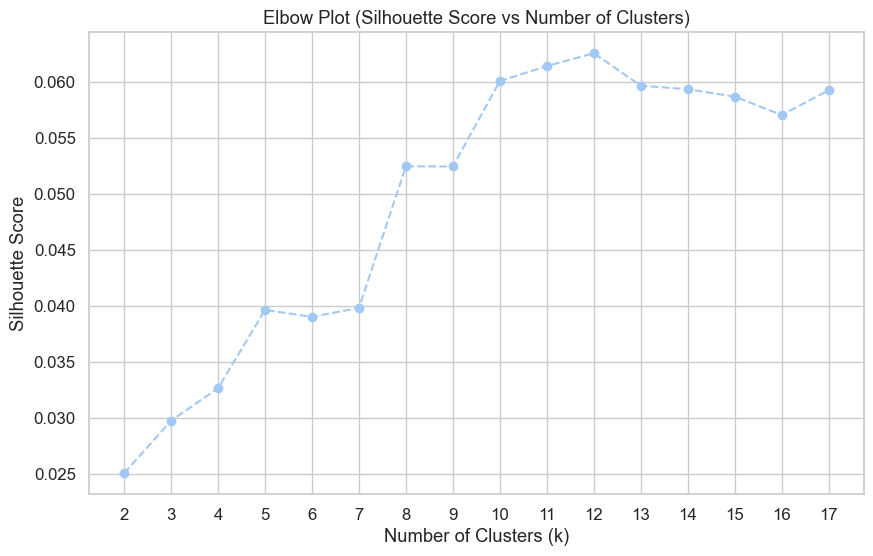

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette scores for different values of k
scores = []
for k in range(2, NUM_CLUSTERS + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, preds)
    scores.append((k, score))

k_values, silhouette_scores = zip(*scores)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title("Elbow Plot (Silhouette Score vs Number of Clusters)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### We see poor Silhouette Score of 0.06 for K = 17 and 0.063 for K = 12 therefore Tf-Idf featurization is not able to effectively differentiate between the clusters. This is largely because Tf-Idf is a sparse representation with a vocab size of 4611 words and it's difficult to make clusters in higher dimensions because of CoD & shrinkage of euclidean distance.



### T-SNE plot using TF-IDF features to see clustering in 2D instead of 4461D

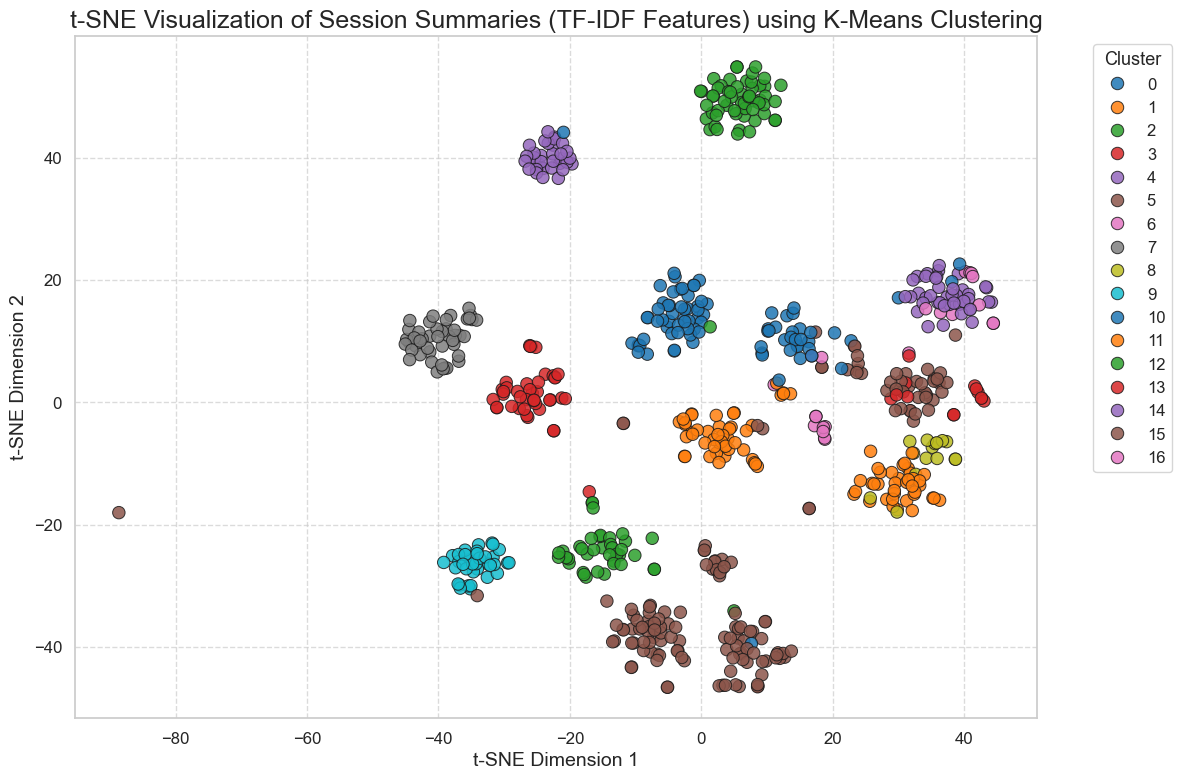

In [87]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# t-SNE dimensionality reduction
tsne_model = TSNE(n_components=2, perplexity=15, random_state=42, max_iter=1000)
tsne_result = tsne_model.fit_transform(X_tfidf.toarray())

df['tsne-2d-one'] = tsne_result[:, 0]
df['tsne-2d-two'] = tsne_result[:, 1]
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x='tsne-2d-one', y='tsne-2d-two',
    hue='cluster',
    palette='tab10',
    s=80,  
    edgecolor='k',  
    alpha=0.85
)

plt.title('t-SNE Visualization of Session Summaries (TF-IDF Features) using K-Means Clustering', fontsize=18)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Although the clutsters look to be separated but we this is a reduced dimensional representation and doen't represent the separability in the parrent dimension: therefore we cannot rely on this alone 

### Trying DBSCAN on TF-IDF features and plotting using TSNE

Counter({-1: 329, 1: 95, 8: 39, 9: 37, 0: 33, 3: 32, 5: 25, 11: 24, 6: 10, 13: 10, 12: 7, 7: 6, 14: 6, 2: 5, 4: 5, 10: 5})
Silhouette Score (DBSCAN, no noise points): 0.210


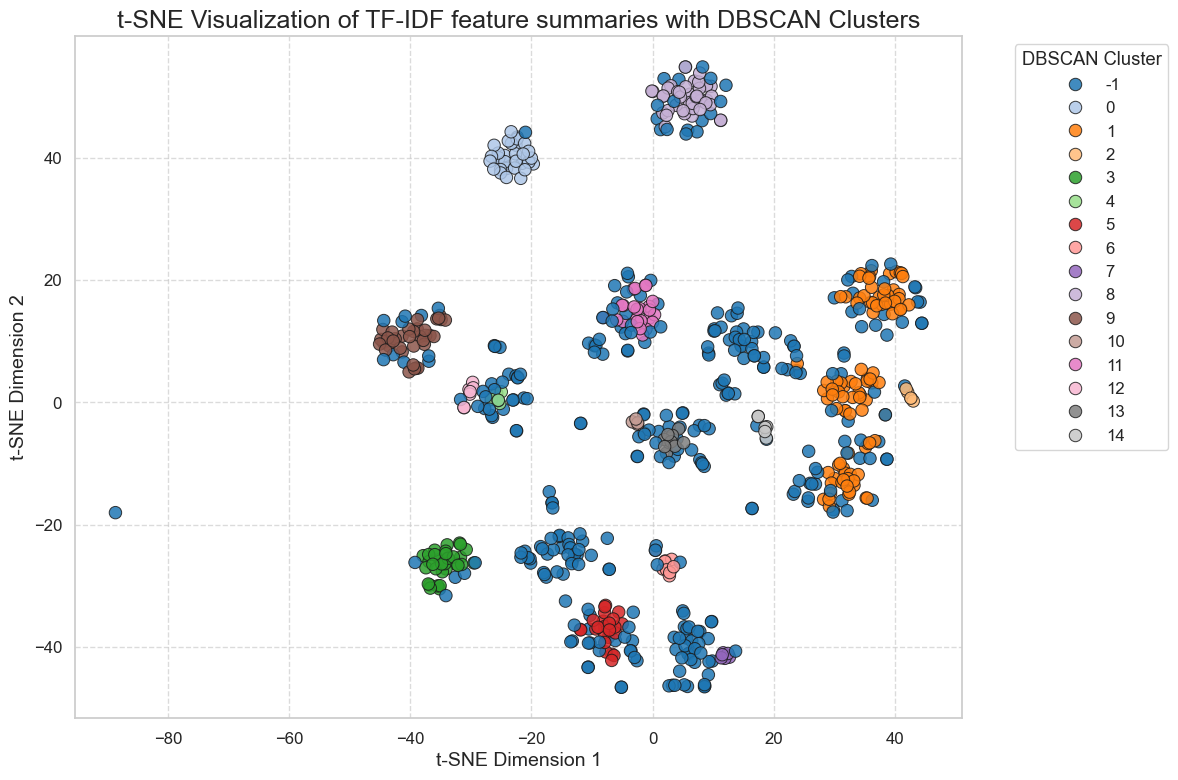

In [88]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

X_dense = X_tfidf.toarray()

# DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5, metric='cosine')
db_labels = dbscan.fit_predict(X_dense)


df['dbscan_cluster'] = db_labels


print(Counter(db_labels))  

# Compute silhouette score (excluding noise points)
mask = db_labels != -1
if len(set(db_labels)) > 1 and mask.sum() > 0:
    sil_score = silhouette_score(X_dense[mask], db_labels[mask], metric='cosine')
    print(f"Silhouette Score (DBSCAN, no noise points): {sil_score:.3f}")
else:
    print("Not enough clusters (excluding noise) to compute silhouette score.")

# -------------------------------
# t-SNE Visualization with DBSCAN clusters
# -------------------------------

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='tsne-2d-one', y='tsne-2d-two',
    hue='dbscan_cluster',
    palette='tab20',
    s=80,
    edgecolor='k',
    alpha=0.85
)

plt.title('t-SNE Visualization of TF-IDF feature summaries with DBSCAN Clusters', fontsize=18)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.legend(title='DBSCAN Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### The Silhoutee score increased significantly to 0.21 which is still not too great & 330 session sumarries are considered as noise. Therefore we can conclude that TF-IDf is not the optimal featurization method for this application. 

## ----------------------------------------------------

# Featurization using Word2Vec 

In [89]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from collections import defaultdict
from collections import Counter
import joblib


NUM_OF_CLUSTERS = 20

# ------------------------
# 1. Load Data
# ------------------------
df = pd.read_csv(url)
df = df.dropna(subset=['Session_Summary'])

# ------------------------
# 2. Preprocessing
# ------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df['Session_Summary'].apply(clean_text)

# ------------------------
# 3. Remove high-frequency words (appearing in >=30% of summaries)
# ------------------------

summary_counts = Counter()

for tokens in df['tokens']:
    unique_tokens = set(tokens)
    summary_counts.update(unique_tokens)

threshold = 0.3 * len(df)
common_words = set([word for word, count in summary_counts.items() if count >= threshold])

print(f"\nNumber of words removed (appearing in ≥80% of summaries): {len(common_words)}")


df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in common_words])

# ------------------------
# 4. Train Word2Vec Model (CBOW)
# ------------------------
w2v_model = Word2Vec(sentences=df['filtered_tokens'], vector_size=300, window=300, min_count=2, sg=0, workers=4, seed=42)

# ------------------------
# 5. Average Word Vectors for Each Summary
# ------------------------
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['vector'] = df['filtered_tokens'].apply(lambda x: get_avg_vector(x, w2v_model))
X_w2v = np.vstack(df['vector'].values)


Number of words removed (appearing in ≥80% of summaries): 23


## N-grams 

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_25095/3845371762.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='frequency', y='ngram', data=ngram_df.head(top_n), palette='viridis')


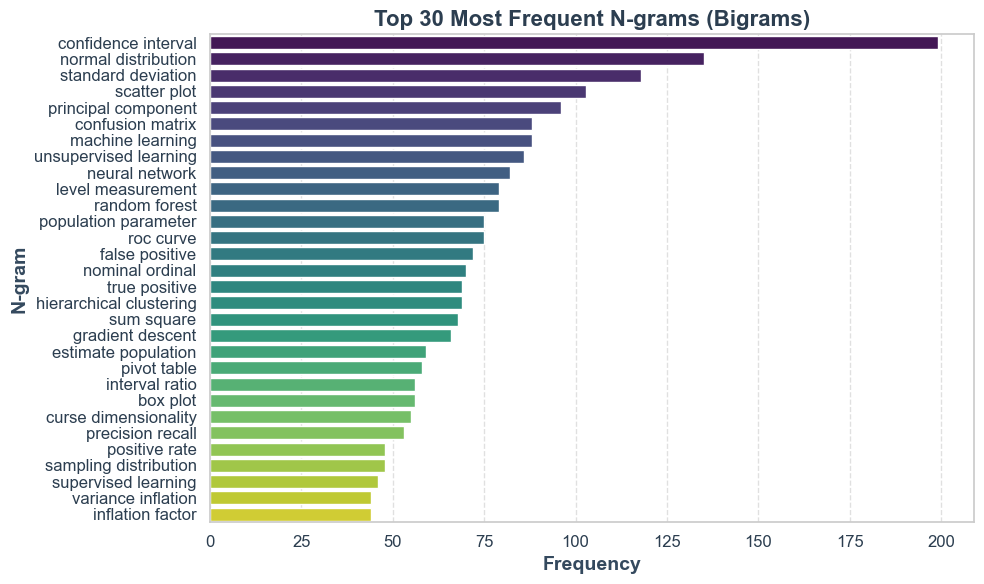

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 6. N-Grams Analysis (Bigrams or Trigrams)
# ------------------------
df['filtered_text'] = df['filtered_tokens'].apply(lambda tokens: ' '.join(tokens))

ngram_vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_features=50)
ngram_matrix = ngram_vectorizer.fit_transform(df['filtered_text'])

ngram_freq = np.asarray(ngram_matrix.sum(axis=0)).flatten()
ngram_terms = ngram_vectorizer.get_feature_names_out()

# Create a DataFrame to display n-grams and their frequencies
ngram_df = pd.DataFrame({'ngram': ngram_terms, 'frequency': ngram_freq})
ngram_df = ngram_df.sort_values(by='frequency', ascending=False)

# ------------------------
# 7. Plot Top N-grams
# ------------------------
sns.set(style="whitegrid", palette="muted")
top_n = 30
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='frequency', y='ngram', data=ngram_df.head(top_n), palette='viridis')
ax.set_title(f"Top {top_n} Most Frequent N-grams (Bigrams)", fontsize=16, fontweight='bold', color='#2c3e50')
ax.set_xlabel("Frequency", fontsize=14, fontweight='bold', color='#34495e')
ax.set_ylabel("N-gram", fontsize=14, fontweight='bold', color='#34495e')
ax.grid(True, axis='x', linestyle='--', alpha=0.6)
ax.tick_params(axis='x', labelsize=12, labelcolor='#2c3e50')
ax.tick_params(axis='y', labelsize=12, labelcolor='#2c3e50')
plt.tight_layout()

plt.show()


## K Means Clustering using Word2Vec Features 

In [91]:
# ------------------------
# 6. KMeans Clustering
# ------------------------
kmeans = KMeans(n_clusters=NUM_OF_CLUSTERS, random_state=42)
df['w2v_cluster'] = kmeans.fit_predict(X_w2v)

# Silhouette Score
sil_score = silhouette_score(X_w2v, df['w2v_cluster'])
print(f"Silhouette Score: {sil_score:.3f} for K = {NUM_OF_CLUSTERS}")



Silhouette Score: 0.323 for K = 20


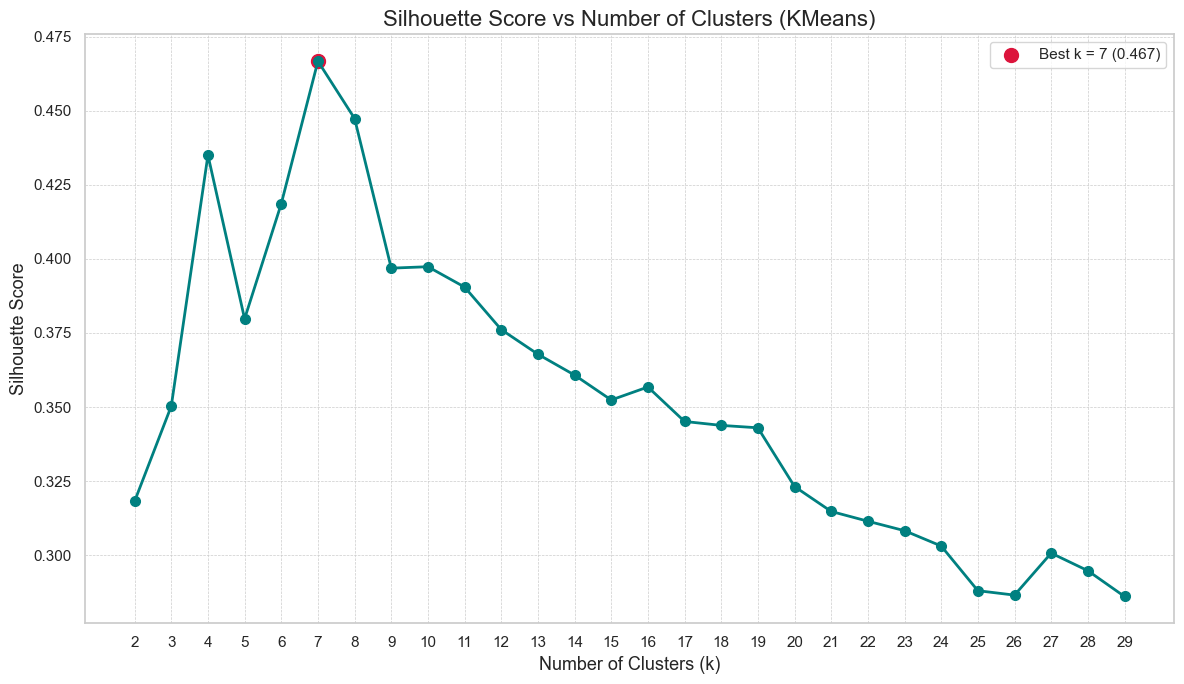

In [92]:
# Silhouette scores for various k
scores = []
k_values = range(2, 30)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_w2v)
    score = silhouette_score(X_w2v, labels)
    scores.append(score)

# Find the optimal k
optimal_k = k_values[np.argmax(scores)]
max_score = max(scores)


plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
plt.plot(k_values, scores, marker='o', linestyle='-', color="#008080", linewidth=2, markersize=7)
plt.scatter(optimal_k, max_score, color='crimson', s=100, label=f'Best k = {optimal_k} ({max_score:.3f})')
plt.title("Silhouette Score vs Number of Clusters (KMeans)", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=13)
plt.ylabel("Silhouette Score", fontsize=13)
plt.xticks(k_values)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

##### From the above we can say that in the broad sense 7 different topics were covered till 15th March as K = 7 gives the highest Silhouette Score of 0.48 signifying broader separation of clusters 

## PCA representation using Word2Vec Features 

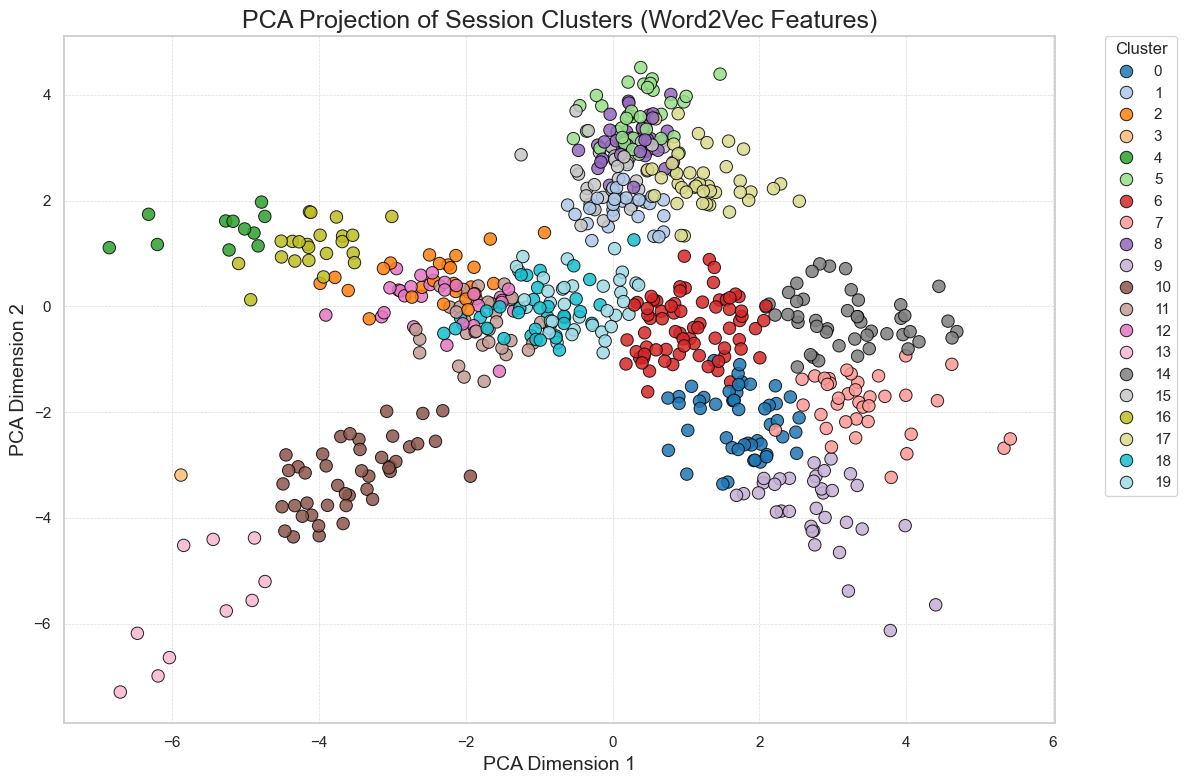

In [93]:
# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_w2v)


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatterplot
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df['w2v_cluster'],
    palette='tab20',
    s=80,             
    alpha=0.85,       
    edgecolor='black' 
)

plt.title("PCA Projection of Session Clusters (Word2Vec Features)", fontsize=18)
plt.xlabel("PCA Dimension 1", fontsize=14)
plt.ylabel("PCA Dimension 2", fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## T-SNE Plot using Word2Vec featuriztion using KMeans Clusters

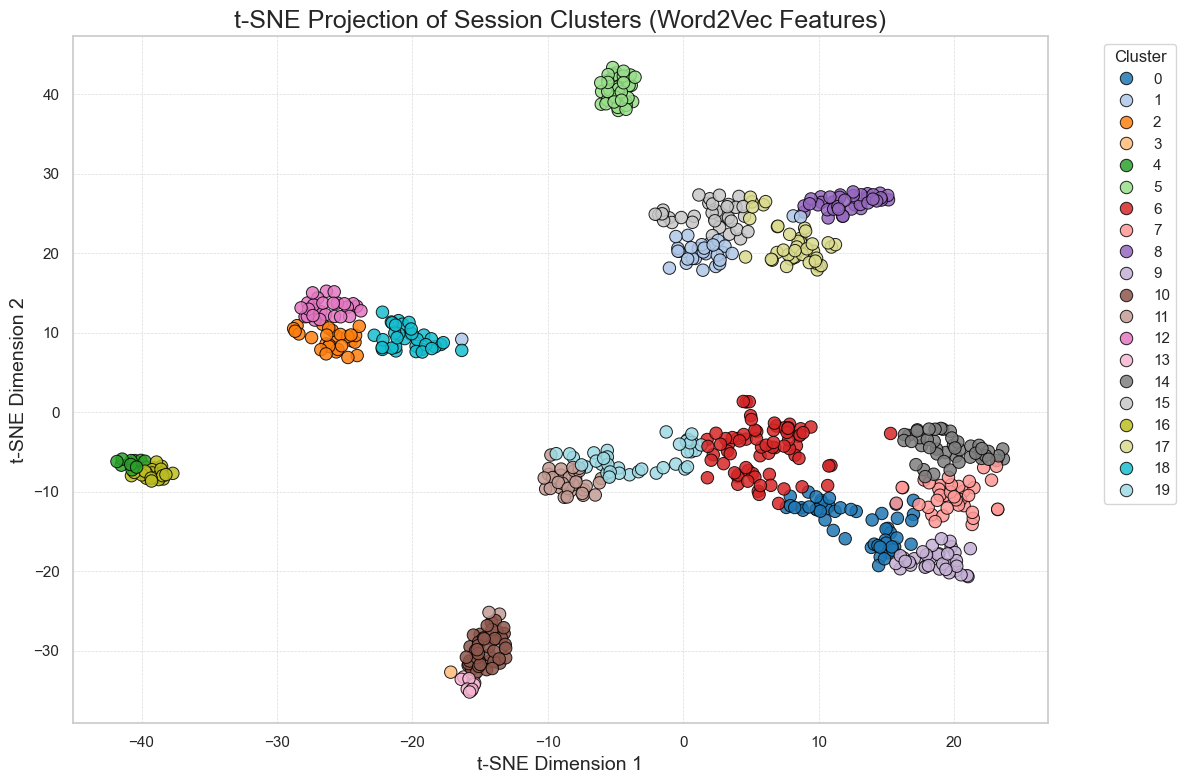

In [94]:
from sklearn.manifold import TSNE
# Run t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne = tsne_model.fit_transform(X_w2v)

df['tsne_dim1'] = X_tsne[:, 0]
df['tsne_dim2'] = X_tsne[:, 1]


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatterplot
sns.scatterplot(
    x='tsne_dim1', y='tsne_dim2',
    hue='w2v_cluster',
    palette='tab20',
    data=df,
    s=80,
    alpha=0.85,
    edgecolor='black'
)

# Title and labels
plt.title("t-SNE Projection of Session Clusters (Word2Vec Features)", fontsize=18)
plt.xlabel("t-SNE Dimension 1", fontsize=14)
plt.ylabel("t-SNE Dimension 2", fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Grouping Serial Numbers by Clusters

In [95]:
from collections import defaultdict
import numpy as np
from tabulate import tabulate

cluster_groups = defaultdict(list)

for idx, row in df.iterrows():
    cluster_id = row['w2v_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

session_clusters = [np.array(cluster_groups[i]) for i in range(NUM_OF_CLUSTERS)]

results_table = []
for i, cluster in enumerate(session_clusters):
    results_table.append([f"Cluster {i}", len(cluster), ", ".join(map(str, cluster))])


print(tabulate(results_table, headers=["Cluster", "No. of Summaries", "Serial Numbers"], tablefmt="fancy_grid"))


╒════════════╤════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Cluster    │   No. of Summaries │ Serial Numbers                                                                                                                                                                                                                                                                                                                                                │
╞════════════╪════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

## Frequency Plot of Summaries in Clusters

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_25095/3888940759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


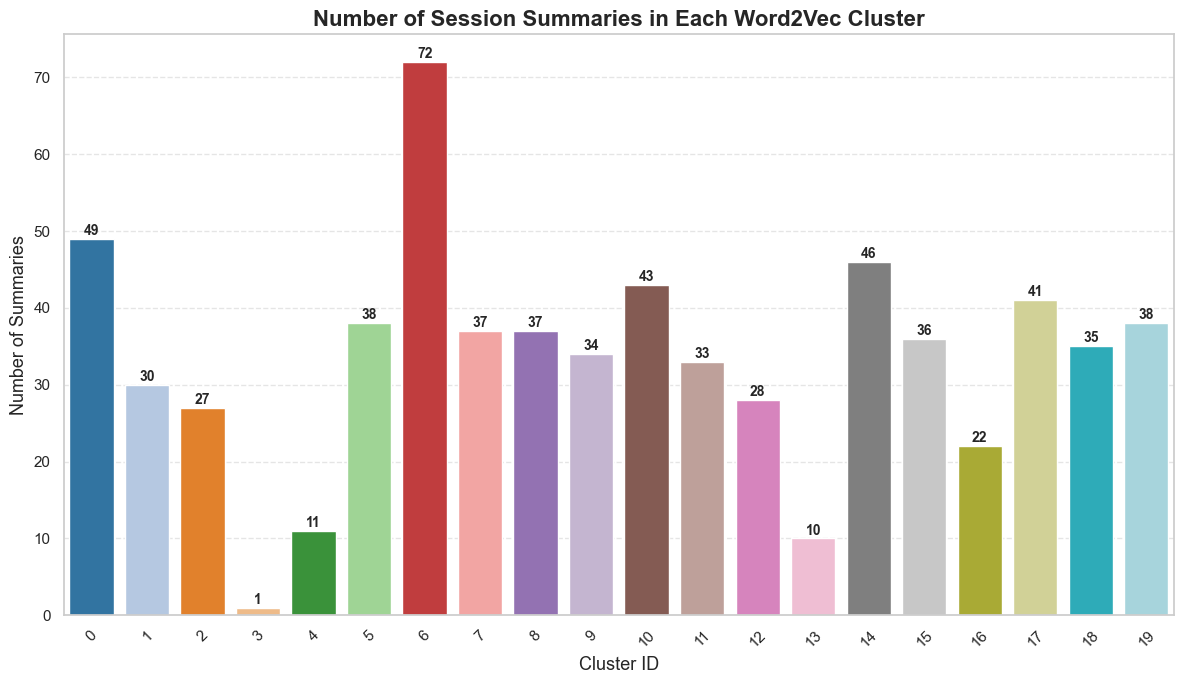

In [96]:
# 9. Plot frequency of sessions in each cluster (Word2Vec clusters)
cluster_counts = df['w2v_cluster'].value_counts().sort_index()

plt.figure(figsize=(12, 7))
sns.barplot(
    x=cluster_counts.index, 
    y=cluster_counts.values, 
    palette='tab20'
)


for i, value in enumerate(cluster_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10, fontweight='bold')

plt.title("Number of Session Summaries in Each Word2Vec Cluster", fontsize=16, fontweight='bold')
plt.xlabel("Cluster ID", fontsize=13)
plt.ylabel("Number of Summaries", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Ranking of each summary in it's parent cluster 

In [97]:
# 10. Compute Global Word2Vec Vector for Each Cluster
# ------------------------

global_cluster_vectors = {
    cluster_id: np.mean(X_w2v[df['w2v_cluster'] == cluster_id], axis=0)
    for cluster_id in range(NUM_OF_CLUSTERS)
}

from scipy.spatial.distance import cosine
ordered_summaries_by_similarity = {}

for cluster_id in range(NUM_OF_CLUSTERS):
    global_vector = global_cluster_vectors[cluster_id]
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'vector']]
    cluster_df['similarity'] = cluster_df['vector'].apply(lambda vec: 1 - cosine(vec, global_vector) if np.linalg.norm(vec) != 0 and np.linalg.norm(global_vector) != 0 else 0)
    
    cluster_df = cluster_df.sort_values(by='similarity', ascending=False)
    ordered_summaries_by_similarity[cluster_id] = cluster_df[['SerialNo', 'similarity']].values.tolist()
    

    print(f"\nSummaries in Cluster {cluster_id} (Total: {len(cluster_df)}) — Sorted by Similarity:")
    for serial, sim in ordered_summaries_by_similarity[cluster_id]:
        print(f"Serial No: {serial}, Similarity: {sim:.4f}")


Summaries in Cluster 0 (Total: 49) — Sorted by Similarity:
Serial No: 120.0, Similarity: 0.9984
Serial No: 581.0, Similarity: 0.9983
Serial No: 486.0, Similarity: 0.9978
Serial No: 302.0, Similarity: 0.9978
Serial No: 251.0, Similarity: 0.9972
Serial No: 112.0, Similarity: 0.9967
Serial No: 291.0, Similarity: 0.9965
Serial No: 114.0, Similarity: 0.9963
Serial No: 280.0, Similarity: 0.9963
Serial No: 542.0, Similarity: 0.9960
Serial No: 390.0, Similarity: 0.9955
Serial No: 30.0, Similarity: 0.9948
Serial No: 664.0, Similarity: 0.9947
Serial No: 59.0, Similarity: 0.9947
Serial No: 405.0, Similarity: 0.9938
Serial No: 600.0, Similarity: 0.9937
Serial No: 331.0, Similarity: 0.9934
Serial No: 400.0, Similarity: 0.9934
Serial No: 6.0, Similarity: 0.9933
Serial No: 267.0, Similarity: 0.9931
Serial No: 20.0, Similarity: 0.9929
Serial No: 458.0, Similarity: 0.9925
Serial No: 456.0, Similarity: 0.9925
Serial No: 10.0, Similarity: 0.9920
Serial No: 519.0, Similarity: 0.9916
Serial No: 308.0, Sim

## Top Words in a Cluster in each summary based on cosine similiarity 

In [98]:
from scipy.spatial.distance import cosine
target_cluster_id = 10

cluster_df = df[df['w2v_cluster'] == target_cluster_id][['SerialNo', 'filtered_tokens', 'vector']]

for idx, row in cluster_df.iterrows():
    serial_no = row['SerialNo']
    tokens = row['filtered_tokens']
    summary_vector = row['vector']
    
    word_similarities = []
    

    for word in set(tokens):
        if word in w2v_model.wv:
            word_vector = w2v_model.wv[word]
            similarity = 1 - cosine(word_vector, summary_vector) if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0 else 0
            word_similarities.append((word, similarity))
    

    word_similarities.sort(key=lambda x: x[1], reverse=True)
 
    print(f"\nSummary Serial No: {serial_no} — Top words by similarity to averaged vector:")
    for word, sim in word_similarities:
        print(f"{word}: {sim:.4f}")


Summary Serial No: 34 — Top words by similarity to averaged vector:
reference: 0.9920
discrete: 0.9819
arbitrary: 0.9804
gender: 0.9783
salary: 0.9718
grade: 0.9690
height: 0.9684
learning: 0.9604
continuous: 0.9600
ml: 0.9598
unsupervised: 0.9542
f: 0.9505
supervised: 0.9502
level: 0.9356
temperature: 0.9325
fitting: 0.9300
known: 0.9279
iv: 0.9243
nominal: 0.9205
measurement: 0.9174
manually: 0.9108
forest: 0.9100
label: 0.9092
ordered: 0.9083
available: 0.9062
color: 0.9051
deduced: 0.8878
iii: 0.8864
ii: 0.8762
fixed: 0.8695
various: 0.8633
unlike: 0.8604
x: 0.8521
weight: 0.8427
topic: 0.8046
zero: 0.7677
equation: 0.7659
two: 0.7598
upon: 0.7290
come: 0.7144
category: 0.6987
hierarchical: 0.6920
random: 0.6724
classification: 0.6670
clustering: 0.6508
last: 0.6495
algorithm: 0.6351
logistic: 0.6291
representative: 0.6140
mlr: 0.5922
us: 0.5383
prior: 0.5318
pressure: 0.5082
population: 0.4781
statistic: 0.4712
curve: 0.4659
technique: 0.4195
point: 0.4093
small: 0.3522
slr: 0.34

## Keywords identified in each cluster based on frequency and cosine similarity of words 

In [99]:
from collections import defaultdict, Counter
from scipy.spatial.distance import cosine
from tabulate import tabulate

# Number of clusters
num_clusters = NUM_OF_CLUSTERS


cluster_keywords = []              
cluster_keyword_scores = []        

for cluster_id in range(num_clusters):
    cluster_df = df[df['w2v_cluster'] == cluster_id][['SerialNo', 'filtered_tokens', 'vector']]
    n_summaries = len(cluster_df)

    word_freq = Counter()
    word_cosine_sum = defaultdict(float)

    for idx, row in cluster_df.iterrows():
        tokens = row['filtered_tokens']
        summary_vector = row['vector']

        for word in set(tokens):
            if word in w2v_model.wv:
                word_vector = w2v_model.wv[word]
                if np.linalg.norm(word_vector) != 0 and np.linalg.norm(summary_vector) != 0:
                    similarity = 1 - cosine(word_vector, summary_vector)
                    word_freq[word] += 1
                    word_cosine_sum[word] += similarity

    word_scores = []
    for word in word_freq:
        avg_cosine = word_cosine_sum[word] / word_freq[word]
        norm_freq = word_freq[word] / n_summaries  
        score = avg_cosine * norm_freq
        word_scores.append((word, score, avg_cosine, norm_freq))

    
    max_score = max(word_scores, key=lambda x: x[1])[1]

    # Get keywords with scores >= 50% of the maximum score
    filtered_keywords = [word for word in word_scores if word[1] >= 0.5 * max_score]

    cluster_keywords.append([word for word, _, _, _ in filtered_keywords])
    cluster_keyword_scores.append(filtered_keywords)

for cluster_id, keyword_data in enumerate(cluster_keyword_scores):
    print(f"\n\nCluster {cluster_id} — Keywords:")

    table_data = []
    for word, score, avg_cosine, norm_freq in keyword_data:
        table_data.append([word, f"{score:.4f}", f"{avg_cosine:.4f}", f"{norm_freq:.4f}"])

    headers = ["Keyword", "Score", "Avg Cosine", "Normalized Freq"]
    print(tabulate(table_data, headers=headers, tablefmt="github", numalign="center"))




Cluster 0 — Keywords:
| Keyword    |  Score  |  Avg Cosine  |  Normalized Freq  |
|------------|---------|--------------|-------------------|
| parameter  | 0.5839  |    0.9229    |      0.6327       |
| interval   | 0.7482  |    0.9166    |      0.8163       |
| population | 0.6354  |    0.9157    |      0.6939       |
| estimate   | 0.4591  |    0.8998    |      0.5102       |
| lie        | 0.4097  |    0.9126    |       0.449       |
| sum        | 0.4209  |    0.9375    |       0.449       |
| statistic  | 0.4462  |    0.9507    |      0.4694       |
| confidence | 0.6926  |    0.8931    |      0.7755       |
| simple     | 0.4629  |    0.945     |      0.4898       |


Cluster 1 — Keywords:
| Keyword        |  Score  |  Avg Cosine  |  Normalized Freq  |
|----------------|---------|--------------|-------------------|
| discussion     | 0.2279  |    0.7598    |        0.3        |
| dataset        | 0.2599  |    0.7796    |      0.3333       |
| plot           | 0.2897  |    0.72

## Reducing Number of Clusters to 17 by combining similar clusters using heatmap of common keyword frequency 

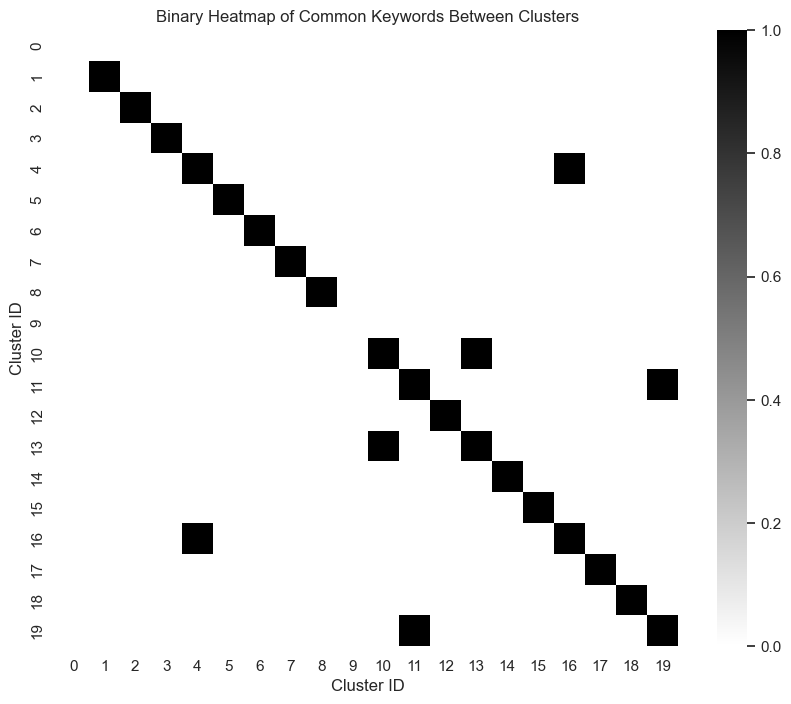

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

binary_common_keywords_matrix = np.zeros((num_clusters, num_clusters))

for i in range(num_clusters):
    for j in range(i, num_clusters):
        common_keywords = set(cluster_keywords[i]) & set(cluster_keywords[j])
        common_count = len(common_keywords)
        if common_count > 10:
            binary_common_keywords_matrix[i, j] = 1
            binary_common_keywords_matrix[j, i] = 1

# Plot the binary heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(binary_common_keywords_matrix, annot=False, cmap="binary", xticklabels=range(num_clusters), yticklabels=range(num_clusters))
plt.title("Binary Heatmap of Common Keywords Between Clusters")
plt.xlabel("Cluster ID")
plt.ylabel("Cluster ID")
plt.show()

## NEW Keywords for the 17 clusters 

In [101]:
from collections import defaultdict
from tabulate import tabulate

same_session_clusters = []
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):  # Avoid self-pairing
        common_keywords = set(cluster_keywords[i]) & set(cluster_keywords[j])
        if len(common_keywords) > 10:
            same_session_clusters.append((i, j, len(common_keywords)))


graph = defaultdict(list)
for i, j, _ in same_session_clusters:
    graph[i].append(j)
    graph[j].append(i)

visited = set()
merged_cluster_groups = []

def dfs(node, group):
    visited.add(node)
    group.append(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, group)

for node in range(num_clusters):
    if node not in visited:
        group = []
        dfs(node, group)
        merged_cluster_groups.append(group)

merged_keywords_set = set()
new_cluster_keywords = []

for group in merged_cluster_groups:
    merged_keywords = []
    for cluster_id in group:
        merged_keywords.extend(cluster_keywords[cluster_id])
        merged_keywords_set.add(cluster_id)
    merged_keywords = list(set(merged_keywords))  
    new_cluster_keywords.append(merged_keywords)

for cluster_id in range(num_clusters):
    if cluster_id not in merged_keywords_set:
        new_cluster_keywords.append(cluster_keywords[cluster_id])

print(f"\n New number of clusters after automatic merging: {len(new_cluster_keywords)}\n")


table_data = []
for cluster_id, keywords in enumerate(new_cluster_keywords):
    table_data.append([cluster_id, len(keywords), ", ".join(keywords)])

headers = ["Cluster ID", "Number of Keywords", "Keywords"]
print(tabulate(table_data, headers=headers, tablefmt="github", numalign="center"))



 New number of clusters after automatic merging: 17

|  Cluster ID  |  Number of Keywords  | Keywords                                                                                                                                                                                                                                                                                                                                                        |
|--------------|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|      0       |          9           | parameter, lie, sum, simple, estimate, interval, statistic, confidence, population                                    

### Frequency distribution of Keywords Acrros NEW Clusters 

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_25095/2910729677.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_cluster_ids, y=merged_keyword_counts, palette='tab20')


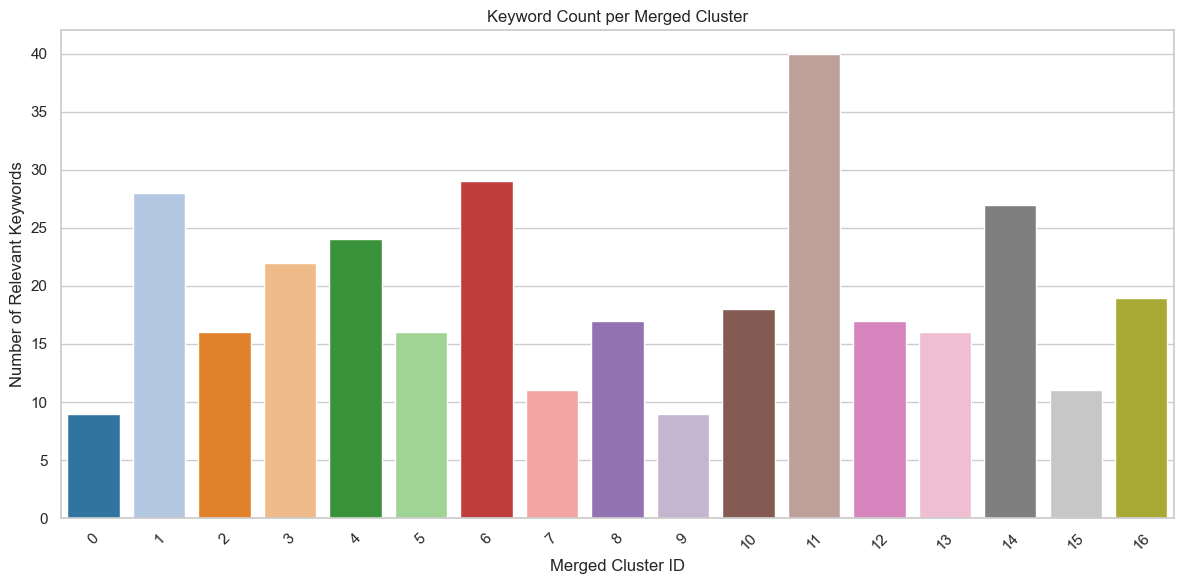

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for new merged clusters
merged_cluster_ids = list(range(len(new_cluster_keywords)))
merged_keyword_counts = [len(keywords) for keywords in new_cluster_keywords]


plt.figure(figsize=(12, 6))
sns.barplot(x=merged_cluster_ids, y=merged_keyword_counts, palette='tab20')
plt.xlabel("Merged Cluster ID")
plt.ylabel("Number of Relevant Keywords")
plt.title("Keyword Count per Merged Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary distribution before and after Merging centers

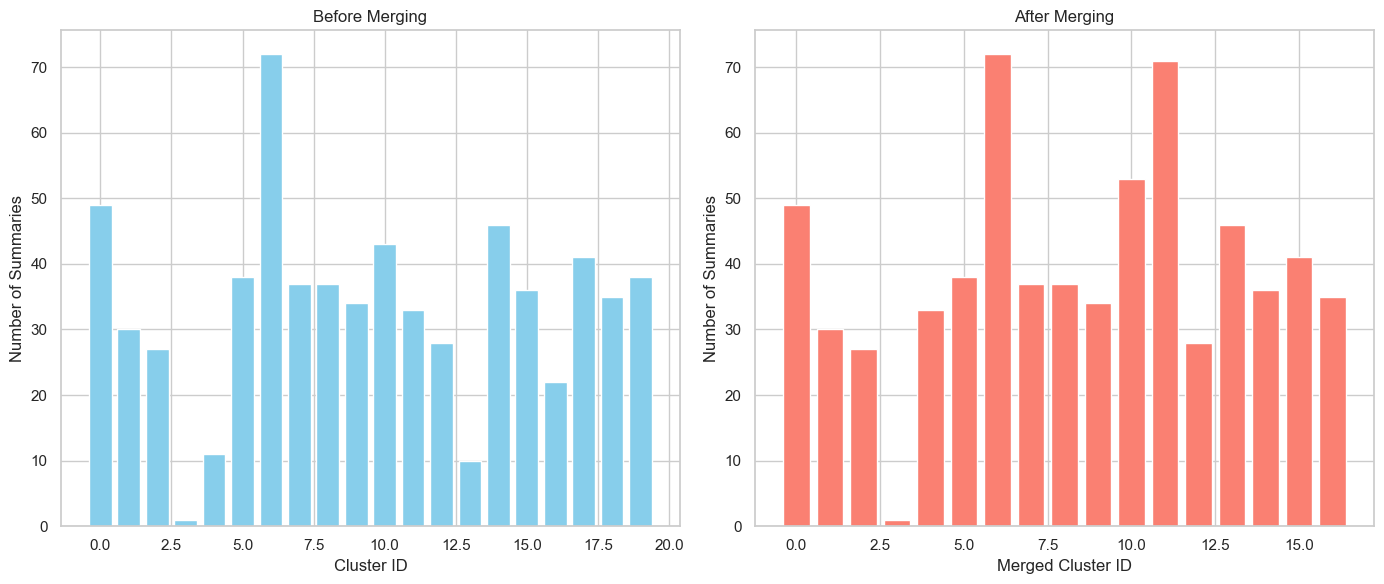

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# BEFORE MERGING: Save original summary counts per cluster
original_summary_counts = [len(session_clusters[i]) for i in range(num_clusters)]


merged_serials = []
merged_cluster_ids = set()

for group in merged_cluster_groups:
    combined_serials = []
    for cluster_id in group:
        combined_serials.extend(session_clusters[cluster_id])
        merged_cluster_ids.add(cluster_id)
    merged_serials.append(np.array(combined_serials))

for cluster_id in range(num_clusters):
    if cluster_id not in merged_cluster_ids:
        merged_serials.append(session_clusters[cluster_id])


new_summary_counts = [len(cluster) for cluster in merged_serials]

# --------------------------
# Step 7: Plot bar plots
# --------------------------

plt.figure(figsize=(14, 6))

# Plot before merging
plt.subplot(1, 2, 1)
plt.bar(range(num_clusters), original_summary_counts, color='skyblue')
plt.title("Before Merging")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Summaries")

plt.subplot(1, 2, 2)
plt.bar(range(len(merged_serials)), new_summary_counts, color='salmon')
plt.title("After Merging")
plt.xlabel("Merged Cluster ID")
plt.ylabel("Number of Summaries")
plt.tight_layout()
plt.show()

# Summaries (as Serial numbers) before Merging centers

In [104]:
from tabulate import tabulate

cluster_data = []
for cluster_id, serials in enumerate(session_clusters):
    cluster_data.append([f"Cluster {cluster_id}", len(serials), ", ".join(map(str, serials))])


headers = ["Cluster ID", "Number of Summaries", "Serial Numbers"]
print(tabulate(cluster_data, headers=headers, tablefmt="fancy_grid"))


╒══════════════╤═══════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Cluster ID   │   Number of Summaries │ Serial Numbers                                                                                                                                                                                                                                                                                                                                                │
╞══════════════╪═══════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

# Summaries (as Serial numbers) after Merging centers

In [105]:
from tabulate import tabulate

merged_cluster_data = []
for merged_id, serials in enumerate(merged_serials):
    merged_cluster_data.append([f"Merged Cluster {merged_id}", len(serials), ", ".join(map(str, serials))])

headers = ["Merged Cluster ID", "Number of Summaries", "Serial Numbers"]
print(tabulate(merged_cluster_data, headers=headers, tablefmt="fancy_grid"))


╒═════════════════════╤═══════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Merged Cluster ID   │   Number of Summaries │ Serial Numbers                                                                                                                                                                                                                                                                                                                                                │
╞═════════════════════╪═══════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [106]:
session_keywords_dict = {i: keywords for i, keywords in enumerate(new_cluster_keywords)}
import joblib
joblib.dump(session_keywords_dict, "session_keywords_dict.pkl")
joblib.dump(df, "df_with_vectors.pkl")
joblib.dump(w2v_model, "w2v_model.pkl")
joblib.dump(global_cluster_vectors, "global_cluster_vectors.pkl")

['global_cluster_vectors.pkl']

### GUI and Word Clouds 

In [107]:
import streamlit as st
import numpy as np
from scipy.spatial.distance import cosine
import pandas as pd
import joblib

# Load preprocessed data and models
df = joblib.load("df_with_vectors.pkl")  
w2v_model = joblib.load("w2v_model.pkl")
global_cluster_vectors = joblib.load("global_cluster_vectors.pkl")  

st.set_page_config(page_title="Summary Explorer", layout="wide")

st.title("📚 Summary Explorer")
st.markdown("Input keywords to find the most relevant session and top summaries.")

# Input box
keyword_input = st.text_input("Enter keywords (comma-separated):", "")

if keyword_input:
    keywords = [word.strip().lower() for word in keyword_input.split(",")]
    keyword_vectors = []

    for word in keywords:
        if word in w2v_model.wv:
            keyword_vectors.append(w2v_model.wv[word])

    if not keyword_vectors:
        st.warning("None of the entered keywords were found in the vocabulary.")
    else:
  
        keyword_avg = np.mean(keyword_vectors, axis=0)

        cluster_scores = []
        for cluster_id, vector in global_cluster_vectors.items():
            if np.linalg.norm(vector) != 0:
                similarity = 1 - cosine(keyword_avg, vector)
            else:
                similarity = 0
            cluster_scores.append((cluster_id, similarity))
        best_cluster, best_score = max(cluster_scores, key=lambda x: x[1])

        st.subheader(f"🔍 Most Relevant Session: Cluster {best_cluster} (Score: {best_score:.4f})")

       
        cluster_df = df[df['w2v_cluster'] == best_cluster][['SerialNo', 'vector', 'Session_Summary']]
        cluster_df['similarity'] = cluster_df['vector'].apply(
            lambda vec: 1 - cosine(vec, keyword_avg) if np.linalg.norm(vec) != 0 and np.linalg.norm(keyword_avg) != 0 else 0
        )
        top_summaries = cluster_df.sort_values(by='similarity', ascending=False).head(3)

        st.markdown("### 📝 Top 3 Relevant Summaries:")
        for i, row in top_summaries.iterrows():
            st.markdown(f"**Serial No: {row['SerialNo']}**")
            st.markdown(f"> {row['Session_Summary']}")
            st.markdown("---")

import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import random
import joblib

session_keywords_dict = joblib.load("session_keywords_dict.pkl")

st.title(" Session Keyword Explorer")

st.markdown(" Session Bubble Chart (Bubble size = number of keywords)")

import matplotlib.pyplot as plt
import numpy as np

# Setup
session_ids = list(session_keywords_dict.keys())
keyword_counts = [len(keywords) for keywords in session_keywords_dict.values()]
sizes = [count * 150 for count in keyword_counts]  
radii = [np.sqrt(size / np.pi) / 100 for size in sizes]  

positions = []
rng = np.random.default_rng(36)
max_attempts = 1000

for i in range(len(session_ids)):
    placed = False
    attempts = 0
    while not placed and attempts < max_attempts:
        x, y = rng.random(), rng.random()
        overlap = False
        for (px, py), pr in zip(positions, radii[:len(positions)]):
            dist = np.sqrt((x - px)**2 + (y - py)**2)
            if dist < (radii[i] + pr + 0.03):  # 0.03 buffer
                overlap = True
                break
        if not overlap:
            positions.append((x, y))
            placed = True
        attempts += 1
    if not placed:
        positions.append((x, y))  # fallback

# Unpack positions
x_vals, y_vals = zip(*positions)

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
scatter = ax.scatter(x_vals, y_vals, s=sizes, alpha=0.8, c=keyword_counts,
                     cmap='rainbow', edgecolors='black', linewidth=1, zorder=2)

# Add session IDs
for i, session_id in enumerate(session_ids):
    ax.text(x_vals[i], y_vals[i], str(session_id), ha='center', va='center',
            fontsize=9, color='white', weight='bold', zorder=3)

# Style
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')
ax.set_title("Sessions as Bubbles", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

st.pyplot(fig)


# Session selector
selected_session = st.selectbox("🔍 Select a session to view its keyword word clouds:", session_ids)

selected_keywords = session_keywords_dict[selected_session]
session_freq = pd.Series(selected_keywords).value_counts().to_dict()

all_keywords = sum(session_keywords_dict.values(), [])
global_freq = pd.Series(all_keywords).value_counts().to_dict()

# Word Clouds
col1, col2 = st.columns([1, 1])  

with col1:
    st.markdown("#### 🌐 Session-specific Keyword Importance")
    wc = WordCloud(width=800, height=500, background_color='white', colormap='viridis')
    wc.generate_from_frequencies(session_freq)
    st.image(wc.to_image())  

with col2:
    st.markdown("#### 🌍 Global Keyword Importance")
    wc_global = WordCloud(width=800, height=500, background_color='white', colormap='plasma')
    wc_global.generate_from_frequencies(global_freq)
    st.image(wc_global.to_image())  